NAME: RUKAYAT ADEOSUN

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
import os

import datetime
t = datetime.datetime.now()
dtStr='{:%Y%m%d}'.format(t)

import warnings
warnings.filterwarnings('ignore')

# import helpFuncs_ML as hf

#import helpFuncs as hf # help functions in the helpFuncs_ML.py file

In [2]:
os.getcwd()

'/Users/rukayatadeosun/Downloads'

In [3]:
#from google.colab import files
#uploaded = files.upload()
df = pd.read_csv('/Users/rukayatadeosun/Downloads/unNorm_CRT_data.csv')
#df = pd.read_csv('/content/unNorm_CRT_data.csv')

In [4]:
#import pandas as pd
#import io
#df = pd.read_csv(io.BytesIO(uploaded['unNorm_CRT_data.csv']))
print(df)

     ACEI_or_ARB   Age    CAD  Concordance   DM  ECG_pre_QRSd  Gender  HTN  \
0            1.0  59.0  False          0.0  0.0         220.0     0.0  0.0   
1            1.0  59.0   True          1.0  0.0         147.0     0.0  1.0   
2            1.0  77.0   True          0.0  1.0         160.0     0.0  1.0   
3            1.0  64.0   True          0.0  1.0         240.0     0.0  1.0   
4            0.0  67.0   True          0.0  1.0         190.0     1.0  1.0   
..           ...   ...    ...          ...  ...           ...     ...  ...   
136          1.0  73.0   True          1.0  1.0         136.0     1.0  1.0   
137          1.0  68.0  False          1.0  0.0         200.0     1.0  1.0   
138          1.0  72.0   True          0.0  0.0         240.0     1.0  1.0   
139          1.0  79.0   True          1.0  1.0         120.0     1.0  1.0   
140          1.0  69.0  False          0.0  1.0         120.0     0.0  0.0   

               ID  LBBB  ...  SPECT_pre_EDV  SPECT_pre_ESE  SPE

In [33]:
# To get the number of rows and column in the dataset
print(df.shape)
print(df.iloc[:,0])

(141, 25)
0      1.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
136    1.0
137    1.0
138    1.0
139    1.0
140    1.0
Name: ACEI_or_ARB, Length: 141, dtype: float64


In [6]:
# To get some statistical analysis on the numerical columns
df.describe()

ACEI_or_ARB         Age  Concordance          DM  ECG_pre_QRSd  \
count   141.000000  141.000000   141.000000  141.000000    141.000000   
mean      0.829787   60.120567     0.255319    0.241135    162.985816   
std       0.377159   11.302007     0.437595    0.429297     25.486407   
min       0.000000   25.000000     0.000000    0.000000    120.000000   
25%       1.000000   53.000000     0.000000    0.000000    150.000000   
50%       1.000000   60.000000     0.000000    0.000000    160.000000   
75%       1.000000   69.000000     1.000000    0.000000    180.000000   
max       1.000000   82.000000     1.000000    1.000000    240.000000   

           Gender         HTN   LBBB          MI        NYHA  ...  \
count  141.000000  141.000000  141.0  141.000000  141.000000  ...   
mean     0.609929    0.588652    1.0    0.212766    2.808511  ...   
std      0.489505    0.493832    0.0    0.410723    0.559527  ...   
min      0.000000    0.000000    1.0    0.000000    2.000000  ...   
25%      0.000000    0.000000    1.0    0.000000    2.000000  ...   
50%      1.000000    1.000000    1.0    0.000000    3.000000  ...   
75%      1.000000    1.000000    1.0    0.000000    3.000000  ...   
max      1.000000    1.000000    1.0    1.000000    4.000000  ...   

       SPECT_pre_EDV  SPECT_pre_ESE  SPECT_pre_ESSI  SPECT_pre_ESV  \
count     141.000000     141.000000      141.000000     141.000000   
mean      268.482270       0.557330        0.810096     203.687943   
std       103.555065       0.170829        0.102249      93.887024   
min        68.000000       0.000000        0.563102      37.000000   
25%       190.000000       0.488957        0.739848     133.000000   
50%       256.000000       0.606250        0.795274     197.000000   
75%       329.000000       0.672774        0.872308     255.000000   
max       614.000000       0.826388        1.174263     553.000000   

       SPECT_pre_LVEF  SPECT_pre_PBW  SPECT_pre_PSD     Smoking  \
count      141.000000     141.000000     141.000000  141.000000   
mean        25.936170     158.326241      50.499503    0.148936   
std          8.919651      72.840775      18.935253    0.357295   
min         10.000000      27.000000      10.160424    0.000000   
25%         20.000000      98.000000      36.119145    0.000000   
50%         25.000000     152.000000      50.095939    0.000000   
75%         31.000000     207.000000      62.775736    0.000000   
max         59.000000     332.000000     100.685722    1.000000   

       SPECT_pre_50scar    response  
count        141.000000  141.000000  
mean          24.964539    0.588652  
std           14.329496    0.493832  
min            3.000000    0.000000  
25%           13.000000    0.000000  
50%           22.000000    1.000000  
75%           33.000000    1.000000  
max           70.000000    1.000000  

[8 rows x 23 columns]

In [7]:
# To get some statistics on numerical and non-numerical columns
# Non-numerical columns gives different output
df.describe(include='all')

ACEI_or_ARB         Age    CAD  Concordance          DM  ECG_pre_QRSd  \
count    141.000000  141.000000    141   141.000000  141.000000    141.000000   
unique          NaN         NaN      2          NaN         NaN           NaN   
top             NaN         NaN  False          NaN         NaN           NaN   
freq            NaN         NaN     98          NaN         NaN           NaN   
mean       0.829787   60.120567    NaN     0.255319    0.241135    162.985816   
std        0.377159   11.302007    NaN     0.437595    0.429297     25.486407   
min        0.000000   25.000000    NaN     0.000000    0.000000    120.000000   
25%        1.000000   53.000000    NaN     0.000000    0.000000    150.000000   
50%        1.000000   60.000000    NaN     0.000000    0.000000    160.000000   
75%        1.000000   69.000000    NaN     1.000000    0.000000    180.000000   
max        1.000000   82.000000    NaN     1.000000    1.000000    240.000000   

            Gender         HTN            ID   LBBB  ...  SPECT_pre_EDV  \
count   141.000000  141.000000           141  141.0  ...     141.000000   
unique         NaN         NaN           141    NaN  ...            NaN   
top            NaN         NaN  SPA-005-GOBA    NaN  ...            NaN   
freq           NaN         NaN             1    NaN  ...            NaN   
mean      0.609929    0.588652           NaN    1.0  ...     268.482270   
std       0.489505    0.493832           NaN    0.0  ...     103.555065   
min       0.000000    0.000000           NaN    1.0  ...      68.000000   
25%       0.000000    0.000000           NaN    1.0  ...     190.000000   
50%       1.000000    1.000000           NaN    1.0  ...     256.000000   
75%       1.000000    1.000000           NaN    1.0  ...     329.000000   
max       1.000000    1.000000           NaN    1.0  ...     614.000000   

        SPECT_pre_ESE  SPECT_pre_ESSI  SPECT_pre_ESV  SPECT_pre_LVEF  \
count      141.000000      141.000000     141.000000      141.000000   
unique            NaN             NaN            NaN             NaN   
top               NaN             NaN            NaN             NaN   
freq              NaN             NaN            NaN             NaN   
mean         0.557330        0.810096     203.687943       25.936170   
std          0.170829        0.102249      93.887024        8.919651   
min          0.000000        0.563102      37.000000       10.000000   
25%          0.488957        0.739848     133.000000       20.000000   
50%          0.606250        0.795274     197.000000       25.000000   
75%          0.672774        0.872308     255.000000       31.000000   
max          0.826388        1.174263     553.000000       59.000000   

        SPECT_pre_PBW  SPECT_pre_PSD     Smoking  SPECT_pre_50scar    response  
count      141.000000     141.000000  141.000000        141.000000  141.000000  
unique            NaN            NaN         NaN               NaN         NaN  
top               NaN            NaN         NaN               NaN         NaN  
freq              NaN            NaN         NaN               NaN         NaN  
mean       158.326241      50.499503    0.148936         24.964539    0.588652  
std         72.840775      18.935253    0.357295         14.329496    0.493832  
min         27.000000      10.160424    0.000000          3.000000    0.000000  
25%         98.000000      36.119145    0.000000         13.000000    0.000000  
50%        152.000000      50.095939    0.000000         22.000000    1.000000  
75%        207.000000      62.775736    0.000000         33.000000    1.000000  
max        332.000000     100.685722    1.000000         70.000000    1.000000  

[11 rows x 25 columns]

In [8]:
# To check the first 5 columns in the data. 
df.head()

ACEI_or_ARB   Age    CAD  Concordance   DM  ECG_pre_QRSd  Gender  HTN  \
0          1.0  59.0  False          0.0  0.0         220.0     0.0  0.0   
1          1.0  59.0   True          1.0  0.0         147.0     0.0  1.0   
2          1.0  77.0   True          0.0  1.0         160.0     0.0  1.0   
3          1.0  64.0   True          0.0  1.0         240.0     0.0  1.0   
4          0.0  67.0   True          0.0  1.0         190.0     1.0  1.0   

             ID  LBBB  ...  SPECT_pre_EDV  SPECT_pre_ESE  SPECT_pre_ESSI  \
0  BRA-002-LOMA   1.0  ...          178.0       0.708673        0.705537   
1  BRA-005-JEMA   1.0  ...          160.0       0.738468        0.674288   
2  BRA-006-NOWA   1.0  ...          165.0       0.561512        0.827469   
3  BRA-007-SISO   1.0  ...          358.0       0.474014        0.880517   
4  BRA-011-AGJO   1.0  ...          404.0       0.624586        0.780956   

   SPECT_pre_ESV  SPECT_pre_LVEF  SPECT_pre_PBW  SPECT_pre_PSD  Smoking  \
0          110.0            38.0          145.0      55.232853      0.0   
1          108.0            33.0           35.0      12.031148      0.0   
2          114.0            31.0           79.0      29.027896      0.0   
3          257.0            28.0           54.0      23.042593      0.0   
4          286.0            29.0           27.0      10.160424      0.0   

   SPECT_pre_50scar  response  
0              17.0         1  
1              19.0         1  
2               4.0         1  
3              25.0         0  
4              38.0         0  

[5 rows x 25 columns]

In [9]:
# To check the type of entries and null count of the different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ACEI_or_ARB       141 non-null    float64
 1   Age               141 non-null    float64
 2   CAD               141 non-null    bool   
 3   Concordance       141 non-null    float64
 4   DM                141 non-null    float64
 5   ECG_pre_QRSd      141 non-null    float64
 6   Gender            141 non-null    float64
 7   HTN               141 non-null    float64
 8   ID                141 non-null    object 
 9   LBBB              141 non-null    float64
 10  MI                141 non-null    float64
 11  NYHA              141 non-null    float64
 12  Race              141 non-null    int64  
 13  SPECT_pre_EDE     141 non-null    float64
 14  SPECT_pre_EDSI    141 non-null    float64
 15  SPECT_pre_EDV     141 non-null    float64
 16  SPECT_pre_ESE     141 non-null    float64
 1

In [10]:
#To check the different columns in the dataset
df.columns

Index(['ACEI_or_ARB', 'Age', 'CAD', 'Concordance', 'DM', 'ECG_pre_QRSd',
       'Gender', 'HTN', 'ID', 'LBBB', 'MI', 'NYHA', 'Race', 'SPECT_pre_EDE',
       'SPECT_pre_EDSI', 'SPECT_pre_EDV', 'SPECT_pre_ESE', 'SPECT_pre_ESSI',
       'SPECT_pre_ESV', 'SPECT_pre_LVEF', 'SPECT_pre_PBW', 'SPECT_pre_PSD',
       'Smoking', 'SPECT_pre_50scar', 'response'],
      dtype='object')

In [11]:
# To check for empty cells in data
print(df.isnull().sum())

ACEI_or_ARB         0
Age                 0
CAD                 0
Concordance         0
DM                  0
ECG_pre_QRSd        0
Gender              0
HTN                 0
ID                  0
LBBB                0
MI                  0
NYHA                0
Race                0
SPECT_pre_EDE       0
SPECT_pre_EDSI      0
SPECT_pre_EDV       0
SPECT_pre_ESE       0
SPECT_pre_ESSI      0
SPECT_pre_ESV       0
SPECT_pre_LVEF      0
SPECT_pre_PBW       0
SPECT_pre_PSD       0
Smoking             0
SPECT_pre_50scar    0
response            0
dtype: int64


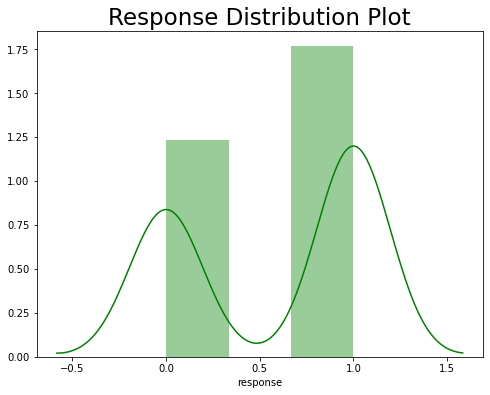

In [12]:
# Create a distribution plot of the target/label column i.e response
f0, ax = plt.subplots(figsize=(8, 6))
plt.title('Response Distribution Plot',fontsize=23)
sns.distplot(df['response'], color='green')

In [13]:
# FEATURE RANKING
# To categorize the different columns into numerical, boolean, categorical and label colums
# Boolean column here includes columns that have either True/False or 1/0 entries

from collections import Counter
def getBoolean(df, ignore_col_list=[], allow_na=False):
    # Get a set of boolean features from df
    if allow_na:
        df.dropna(inplace=True)
    df = df.drop(columns=ignore_col_list)
    bool_cols = [col for col in df if (len(df[col].value_counts()) > 0) & \
                 all(df[col].value_counts().index.isin([0, 1]))]
    return bool_cols


def getNumeric(df, label_cols, bool_cols, cat_cols, ignore_col_list=[]):
    # Get a set of numeric features from df
    all_cols = df.columns.values.tolist()
    num_cols = [col for col in all_cols if col not in (label_cols + bool_cols + cat_cols + ignore_col_list)]
    return num_cols

def getCounter(df, ignore_col_list=[]):
    for col in df.drop(columns=ignore_col_list):
        print(col + ' shape {}'.format(Counter(df[col])))

In [29]:
# To Check boolean, categorical, numerical features
# Categorical column includes columns that have entries with more than two number
label_cols = ['response']
bool_cols = getBoolean(df, ignore_col_list=(label_cols))
cat_cols = ['NYHA', 'Race']
num_cols = getNumeric(df, label_cols, bool_cols, cat_cols, ignore_col_list=['ID'])
features = bool_cols + cat_cols + num_cols
print('Bool columns: ', bool_cols)
print()
print('Categorical columns: ', cat_cols)
print()
print('Numeric columns: ', num_cols)
print()
print('All features: ', features)
print(len(features))
print(len(num_cols))

Bool columns:  ['ACEI_or_ARB', 'CAD', 'Concordance', 'DM', 'Gender', 'HTN', 'LBBB', 'MI', 'Smoking']

Categorical columns:  ['NYHA', 'Race']

Numeric columns:  ['Age', 'ECG_pre_QRSd', 'SPECT_pre_EDE', 'SPECT_pre_EDSI', 'SPECT_pre_EDV', 'SPECT_pre_ESE', 'SPECT_pre_ESSI', 'SPECT_pre_ESV', 'SPECT_pre_LVEF', 'SPECT_pre_PBW', 'SPECT_pre_PSD', 'SPECT_pre_50scar']

All features:  ['ACEI_or_ARB', 'CAD', 'Concordance', 'DM', 'Gender', 'HTN', 'LBBB', 'MI', 'Smoking', 'NYHA', 'Race', 'Age', 'ECG_pre_QRSd', 'SPECT_pre_EDE', 'SPECT_pre_EDSI', 'SPECT_pre_EDV', 'SPECT_pre_ESE', 'SPECT_pre_ESSI', 'SPECT_pre_ESV', 'SPECT_pre_LVEF', 'SPECT_pre_PBW', 'SPECT_pre_PSD', 'SPECT_pre_50scar']
23
12


In [15]:
# To show the structure of the non-numerical columns
getCounter(df, ignore_col_list=(num_cols + ['ID']))

ACEI_or_ARB shape Counter({1.0: 117, 0.0: 24})
CAD shape Counter({False: 98, True: 43})
Concordance shape Counter({0.0: 105, 1.0: 36})
DM shape Counter({0.0: 107, 1.0: 34})
Gender shape Counter({1.0: 86, 0.0: 55})
HTN shape Counter({1.0: 83, 0.0: 58})
LBBB shape Counter({1.0: 141})
MI shape Counter({0.0: 111, 1.0: 30})
NYHA shape Counter({3.0: 92, 2.0: 38, 4.0: 11})
Smoking shape Counter({0.0: 120, 1.0: 21})
response shape Counter({1: 83, 0: 58})


In [16]:
# To show the statistics of the numerical columns
df[num_cols].describe()

Age  ECG_pre_QRSd        Race  SPECT_pre_EDE  SPECT_pre_EDSI  \
count  141.000000    141.000000  141.000000     141.000000      141.000000   
mean    60.120567    162.985816    3.609929       0.517009        0.834435   
std     11.302007     25.486407    1.157417       0.189191        0.098897   
min     25.000000    120.000000    1.000000       0.000000        0.624689   
25%     53.000000    150.000000    3.000000       0.443912        0.767524   
50%     60.000000    160.000000    4.000000       0.563543        0.826087   
75%     69.000000    180.000000    4.000000       0.641020        0.896070   
max     82.000000    240.000000    5.000000       0.780873        1.173049   

       SPECT_pre_EDV  SPECT_pre_ESE  SPECT_pre_ESSI  SPECT_pre_ESV  \
count     141.000000     141.000000      141.000000     141.000000   
mean      268.482270       0.557330        0.810096     203.687943   
std       103.555065       0.170829        0.102249      93.887024   
min        68.000000       0.000000        0.563102      37.000000   
25%       190.000000       0.488957        0.739848     133.000000   
50%       256.000000       0.606250        0.795274     197.000000   
75%       329.000000       0.672774        0.872308     255.000000   
max       614.000000       0.826388        1.174263     553.000000   

       SPECT_pre_LVEF  SPECT_pre_PBW  SPECT_pre_PSD  SPECT_pre_50scar  
count      141.000000     141.000000     141.000000        141.000000  
mean        25.936170     158.326241      50.499503         24.964539  
std          8.919651      72.840775      18.935253         14.329496  
min         10.000000      27.000000      10.160424          3.000000  
25%         20.000000      98.000000      36.119145         13.000000  
50%         25.000000     152.000000      50.095939         22.000000  
75%         31.000000     207.000000      62.775736         33.000000  
max         59.000000     332.000000     100.685722         70.000000

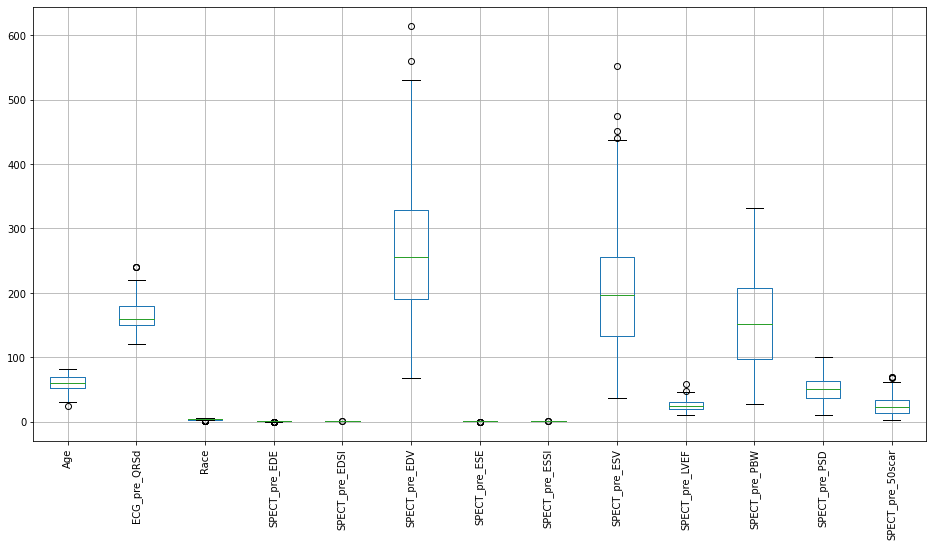

In [17]:
# Using boxplot to show the distribution of the numerical features/columns
boxplot = df[num_cols].boxplot(figsize=(16,8))
boxplot.set_xticklabels(df[num_cols].columns.values, rotation=90);

In [18]:
# To check for outliers in SPECT_pre_EDV and SPECT_pre_ESV

def check_outliers(df, col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1
    print('Q1: ', q1)
    print('Q3: ', q3)
    print('IQR: ', iqr)
    temp = (df[col] < (q1 - 1.5 * iqr)) | (df[col] > (q3 + 1.5 * iqr))
    return temp

In [19]:
temp = check_outliers(df, 'SPECT_pre_EDV')
df.loc[temp == True]

Q1:  190.0
Q3:  329.0
IQR:  139.0


ACEI_or_ARB   Age    CAD  Concordance   DM  ECG_pre_QRSd  Gender  HTN  \
56          1.0  59.0   True          0.0  1.0         160.0     0.0  1.0   
75          1.0  51.0  False          1.0  0.0         130.0     1.0  1.0   

              ID  LBBB  ...  SPECT_pre_EDV  SPECT_pre_ESE  SPECT_pre_ESSI  \
56  CUB-020-ROZO   1.0  ...          614.0        0.53757        0.843219   
75  CUB-044-HEOM   1.0  ...          560.0        0.00000        1.095740   

    SPECT_pre_ESV  SPECT_pre_LVEF  SPECT_pre_PBW  SPECT_pre_PSD  Smoking  \
56          553.0            10.0          265.0      80.725601      1.0   
75          475.0            15.0          278.0      84.128169      0.0   

    SPECT_pre_50scar  response  
56              15.0         1  
75              42.0         1  

[2 rows x 25 columns]

In [20]:
temp = check_outliers(df, 'SPECT_pre_ESV')
df.loc[temp == True]

Q1:  133.0
Q3:  255.0
IQR:  122.0


ACEI_or_ARB   Age    CAD  Concordance   DM  ECG_pre_QRSd  Gender  HTN  \
43           1.0  51.0  False          0.0  0.0         200.0     1.0  1.0   
56           1.0  59.0   True          0.0  1.0         160.0     0.0  1.0   
75           1.0  51.0  False          1.0  0.0         130.0     1.0  1.0   
116          1.0  46.0  False          0.0  0.0         160.0     1.0  0.0   

                   ID  LBBB  ...  SPECT_pre_EDV  SPECT_pre_ESE  \
43       CUB-006-ROEM   1.0  ...          530.0       0.545280   
56       CUB-020-ROZO   1.0  ...          614.0       0.537570   
75       CUB-044-HEOM   1.0  ...          560.0       0.000000   
116  IND-KAP-002-SIDA   1.0  ...          506.0       0.435187   

     SPECT_pre_ESSI  SPECT_pre_ESV  SPECT_pre_LVEF  SPECT_pre_PBW  \
43         0.838254          452.0            15.0          241.0   
56         0.843219          553.0            10.0          265.0   
75         1.095740          475.0            15.0          278.0   
116        0.900340          441.0            13.0          278.0   

     SPECT_pre_PSD  Smoking  SPECT_pre_50scar  response  
43       69.492420      0.0              17.0         1  
56       80.725601      1.0              15.0         1  
75       84.128169      0.0              42.0         1  
116      90.057079      0.0              31.0         1  

[4 rows x 25 columns]

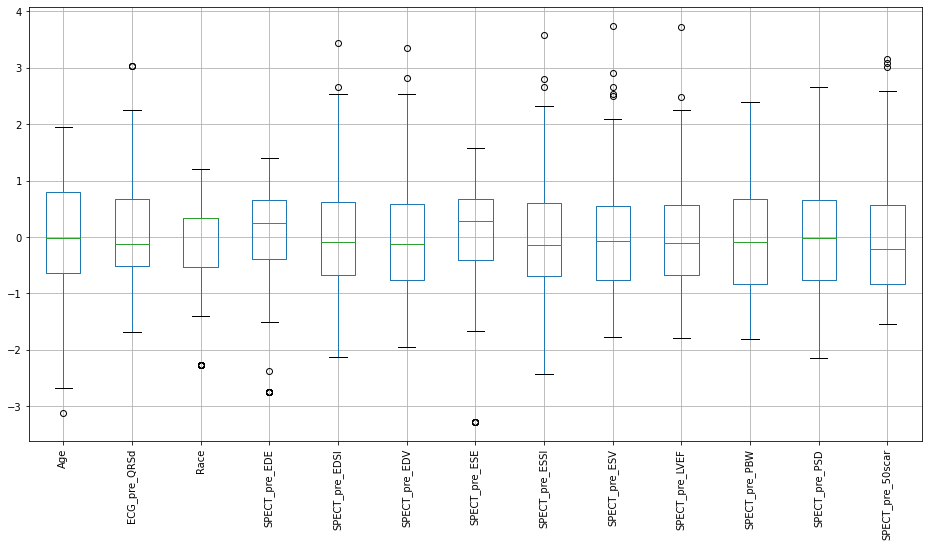

In [21]:
# Normalization
'''
 StandardScaler(): Attributes with a Gaussian distribution and different means and standard 
 deviations are transformed into a standard Gaussian distribution with a mean of 0 and a standard deviation of 1
 
 MinMaxScaler(): Transform features by scaling each feature to a given range or same scale. 
 The attributes are rescaled to the range of 0 and 1 and its called normalization.
 
 RobustScaler(): Scale features using statistics that are robust to outliers.
 Binarizer(): Using a binary threshold, it is possible to transform our data by marking the values above it 1 and 
 those equal to or below it as 0
 
 PowerTransformer()
 QuantileTransformer()
 QuantileTransformer()
 
 Normalizer(): Rescales each observation to a length of 1 (a unit norm). 
'''
# Made a copy of the numerical features for further analysis
norm_cols = num_cols.copy()

#ignore#norm_cols.remove('SPECT_pre_PBW')
#ignore#norm_cols.remove('SPECT_pre_PBW_noScar')

# Used the standard scaler to standardize the features
df[norm_cols] = preprocessing.StandardScaler().fit_transform(df[norm_cols])

#ignore#df['SPECT_pre_PBW'] = df['SPECT_pre_PBW']/360
#ignore#df['SPECT_pre_PBW_noScar'] = df['SPECT_pre_PBW_noScar']/360

# Boxplot of the standardized features 
boxplot = df[num_cols].boxplot(figsize=(16,8))
boxplot.set_xticklabels(df[num_cols].columns.values, rotation=90);

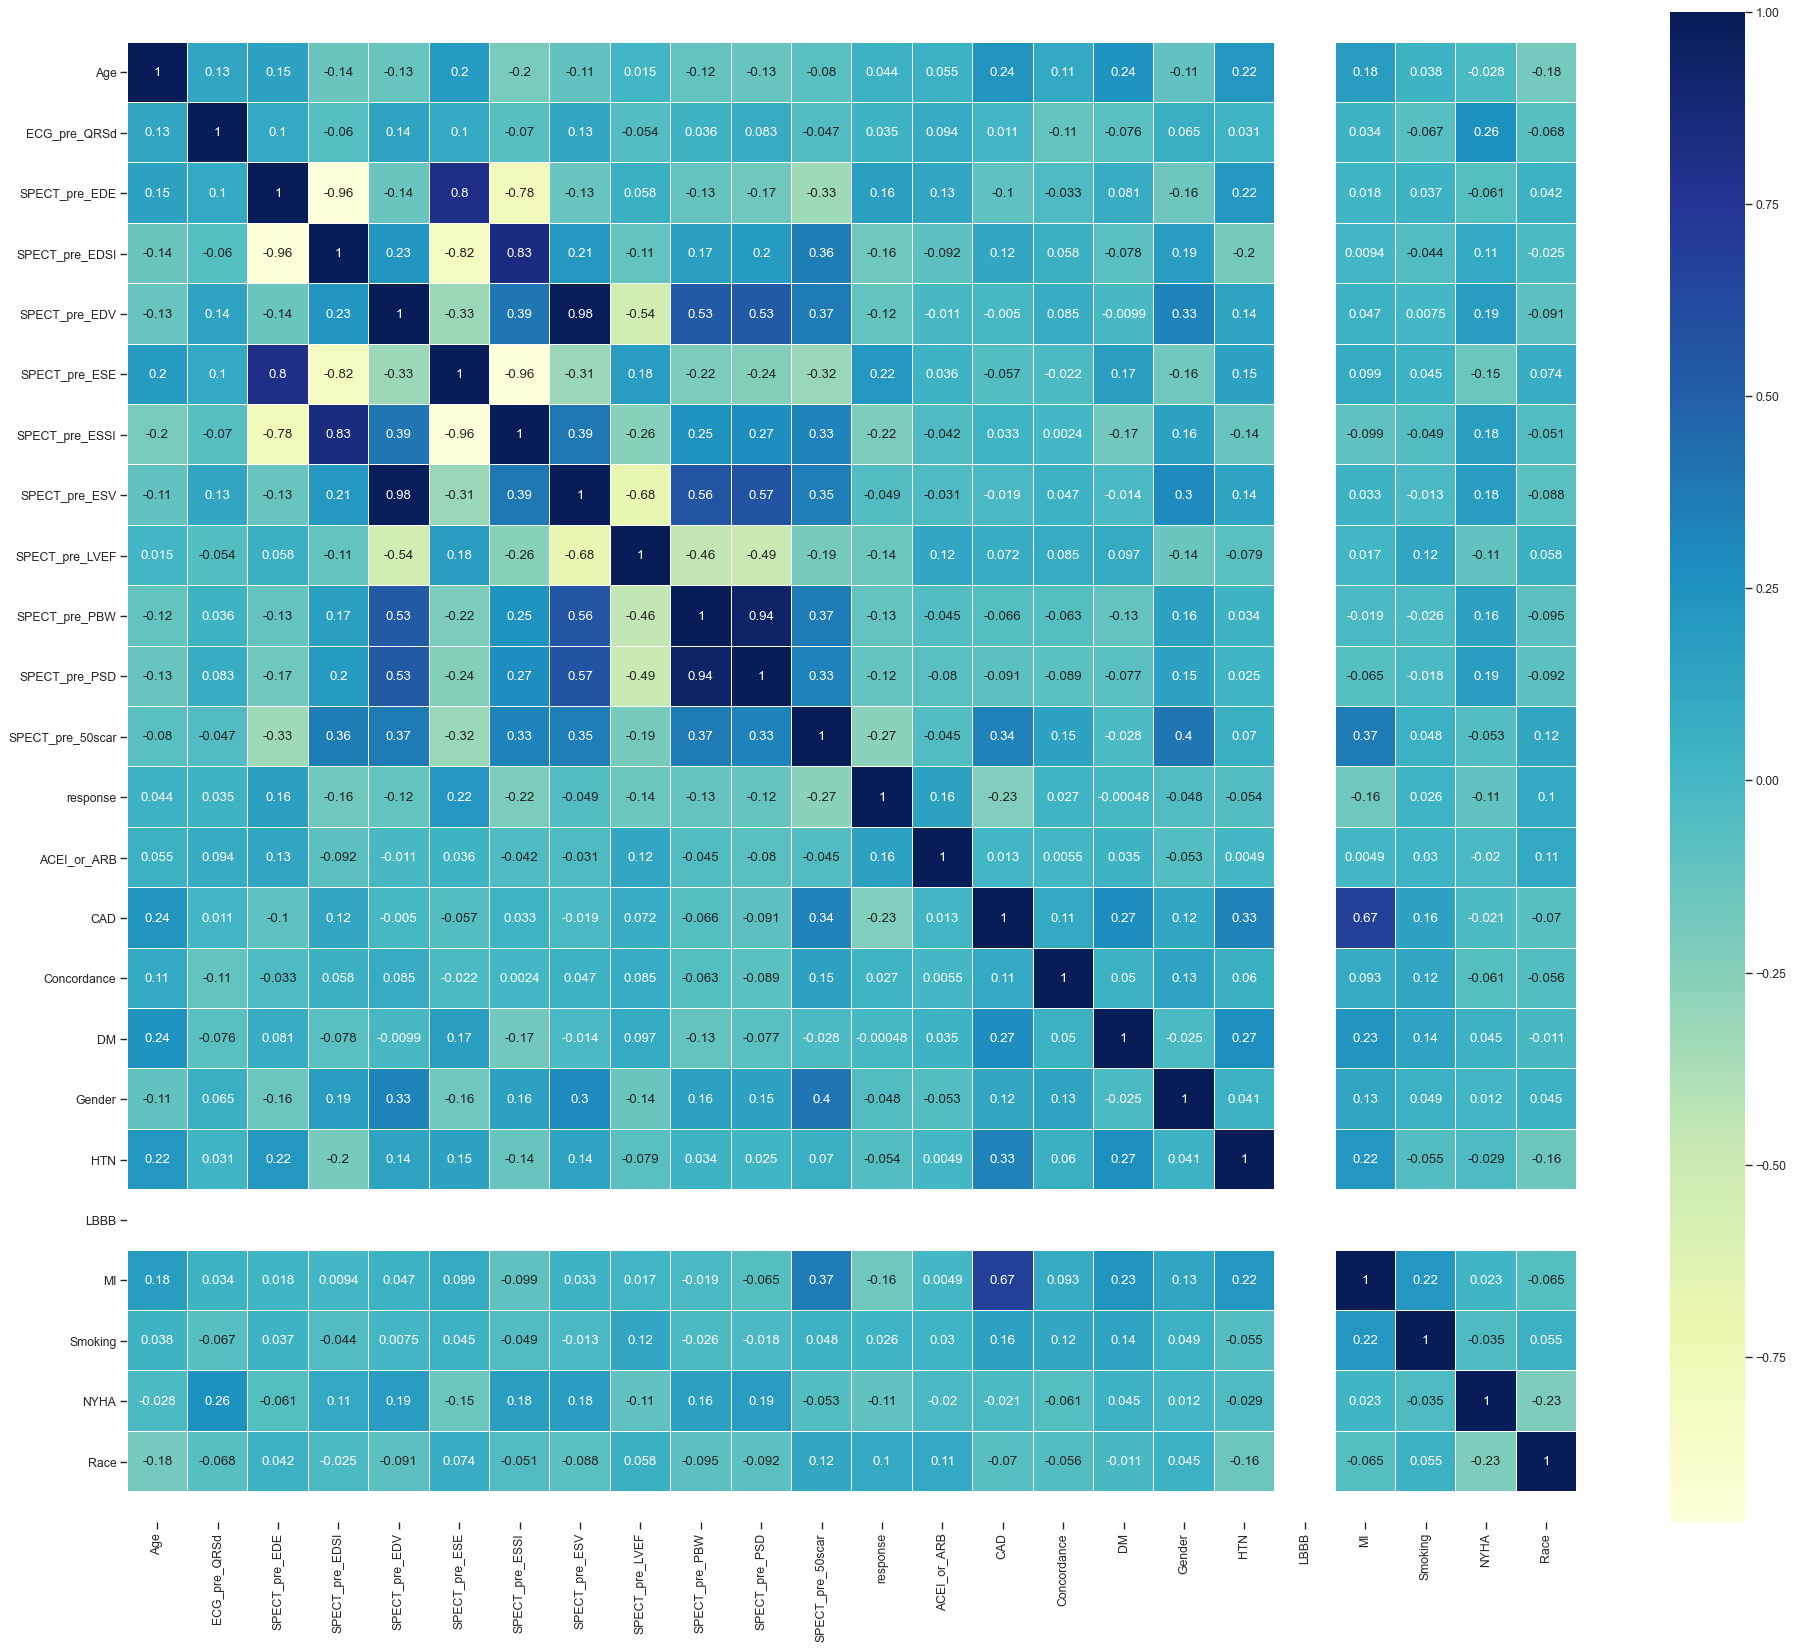

In [118]:
# Pearson Correlation
sns.set(style='ticks', color_codes=True)
plt.figure(figsize=(30, 25), dpi=80)
cor = df[num_cols+label_cols+bool_cols+cat_cols].astype(float).corr()

sns.heatmap(cor, 
            linewidths=0.1, 
            square=True, cmap="YlGnBu",
            linecolor='white', 
            annot=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

ESE - EDE = **0.8**;
ESSI - EDSI = **0.83**;
ESV - EDV = **0.98**;
PSD - PBW = **0.94**

In [23]:
#Correlation with output variable
cor_target = abs(cor['response']) # Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

Race                0.104673
SPECT_pre_EDE       0.163451
SPECT_pre_EDSI      0.164884
SPECT_pre_EDV       0.118170
SPECT_pre_ESE       0.222828
SPECT_pre_ESSI      0.215521
SPECT_pre_LVEF      0.143840
SPECT_pre_PBW       0.126903
SPECT_pre_PSD       0.122867
SPECT_pre_50scar    0.268557
response            1.000000
Name: response, dtype: float64

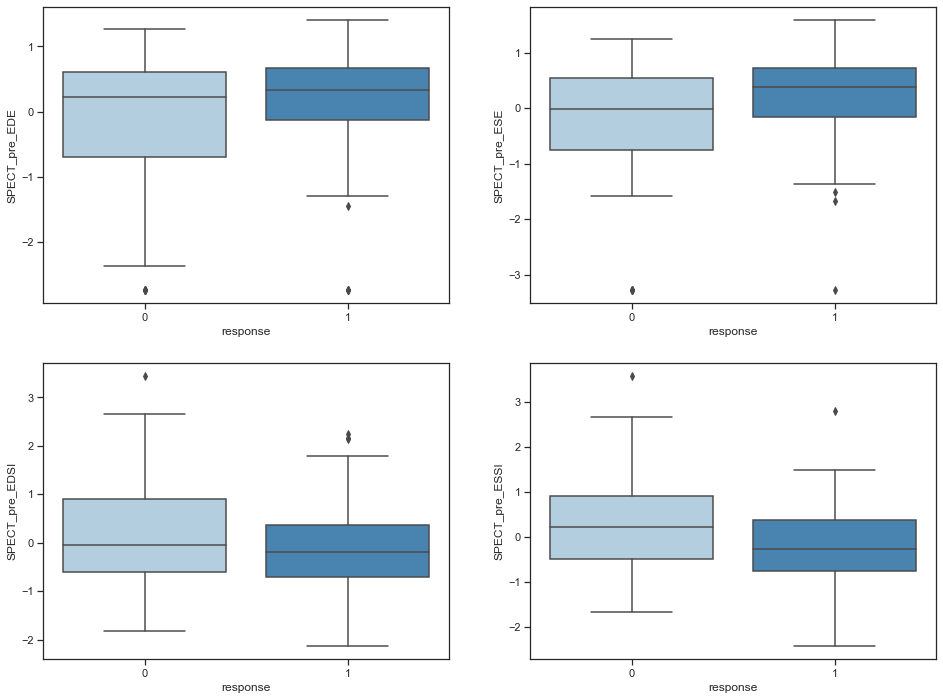

In [24]:
# create box plot for features
f2, ax = plt.subplots(2, 2, figsize=(16, 12))
sns.boxplot('response', 'SPECT_pre_EDE', data=df, ax=ax[0, 0], palette='Blues')
sns.boxplot('response', 'SPECT_pre_ESE', data=df, ax=ax[0, 1], palette='Blues')
sns.boxplot('response', 'SPECT_pre_EDSI', data=df, ax=ax[1, 0], palette='Blues')
sns.boxplot('response', 'SPECT_pre_ESSI', data=df, ax=ax[1, 1], palette='Blues')

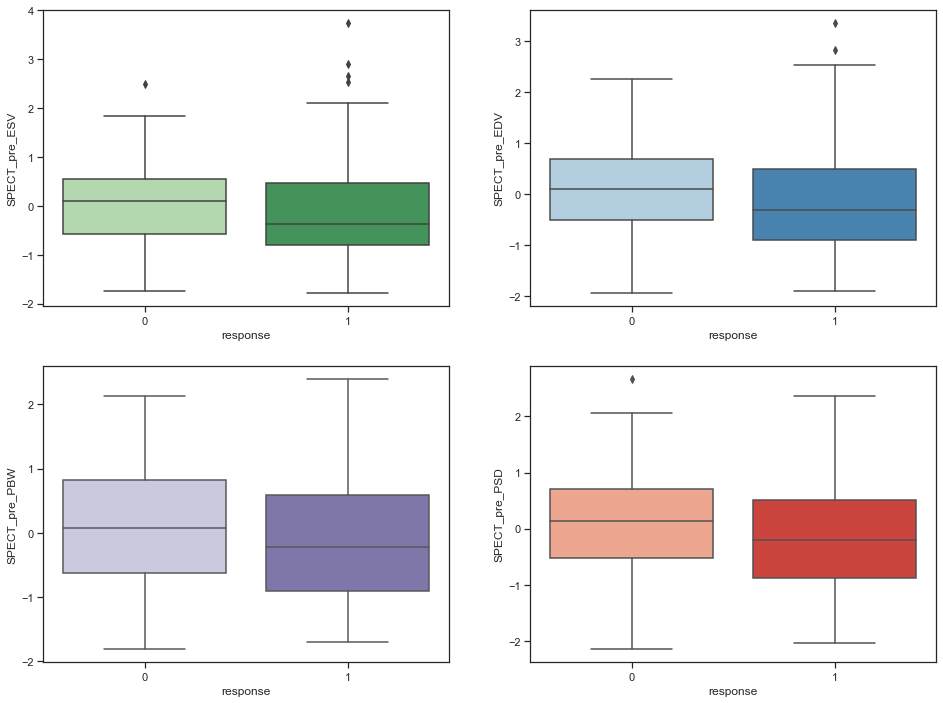

In [25]:
# create box plot for features
f2, ax = plt.subplots(2, 2, figsize=(16, 12))
sns.boxplot('response', 'SPECT_pre_ESV', data=df, ax=ax[0, 0], palette='Greens')
sns.boxplot('response', 'SPECT_pre_EDV', data=df, ax=ax[0, 1], palette='Blues')
sns.boxplot('response', 'SPECT_pre_PBW', data=df, ax=ax[1, 0], palette='Purples')
sns.boxplot('response', 'SPECT_pre_PSD', data=df, ax=ax[1, 1], palette='Reds')

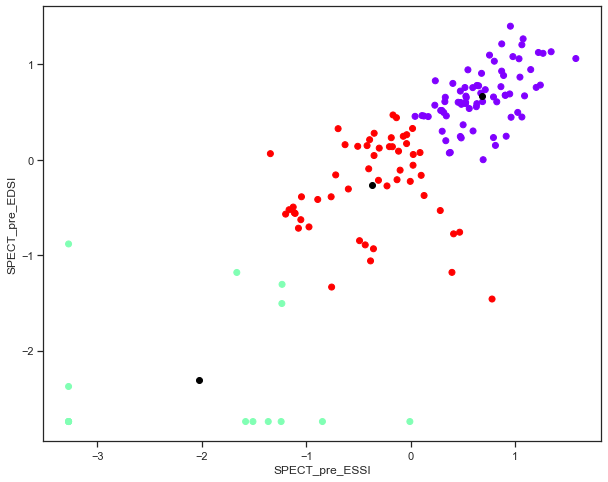

In [155]:
# Normalizing over the standard deviation
#getCounter(df, ignore_col_list=(num_cols + ['ID']))
#df1 = df.values(ignore_col_list=(['ID']))
f1 = df_['SPECT_pre_ESE'].values 
f2 = df_['SPECT_pre_EDE'].values

X=np.array(list(zip(f1,f2)))

fig=plt.gcf() 
fig.set_size_inches(10,8) 
kmeans = KMeans(n_clusters=3).fit(X) 

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')    
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black') 
plt.xlabel('SPECT_pre_ESSI')
plt.ylabel('SPECT_pre_EDSI')
plt.show()

#X = df[num_cols + bool_cols + cat_cols + label_cols]
# Clus_dataset = StandardScaler().fit_transform(X)

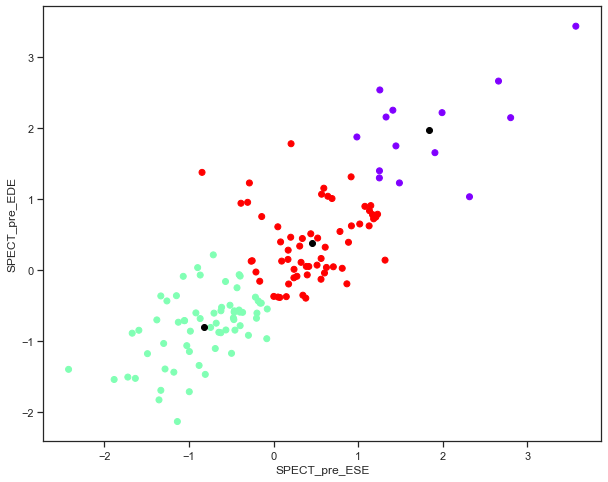

In [185]:
f3 = df_['SPECT_pre_ESSI'].values 
f4 = df_['SPECT_pre_EDSI'].values

X=np.array(list(zip(f3,f4)))

fig=plt.gcf() 
fig.set_size_inches(10,8) 
kmeans = KMeans(n_clusters=3).fit(X) 

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')    
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black') 
plt.xlabel('SPECT_pre_ESE')
plt.ylabel('SPECT_pre_EDE')
plt.show()


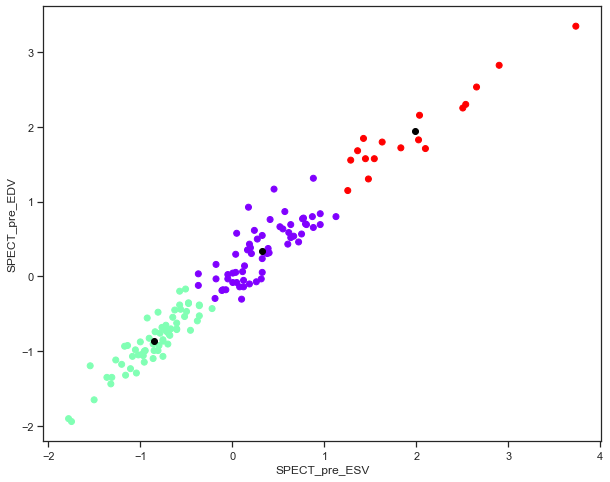

In [153]:
f5 = df_['SPECT_pre_ESV'].values 
f6 = df_['SPECT_pre_EDV'].values

X=np.array(list(zip(f5,f6)))

fig=plt.gcf() 
fig.set_size_inches(10,8) 
kmeans = KMeans(n_clusters=3).fit(X) 

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')    
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black') 
plt.xlabel('SPECT_pre_ESV')
plt.ylabel('SPECT_pre_EDV')
plt.show()


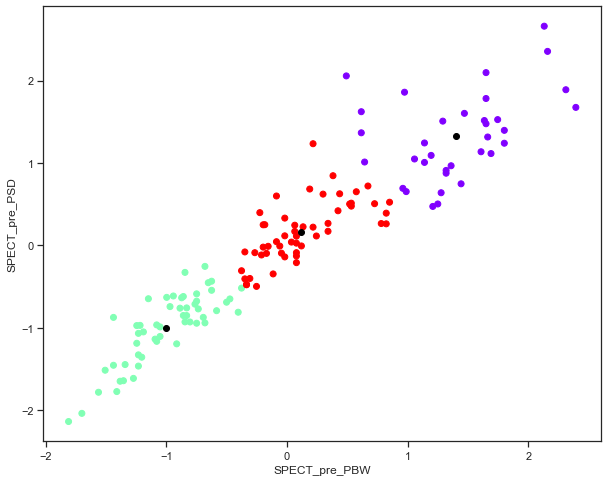

In [154]:
f6 = df_['SPECT_pre_PBW'].values 
f7 = df_['SPECT_pre_PSD'].values

X=np.array(list(zip(f6,f7)))

fig=plt.gcf() 
fig.set_size_inches(10,8) 
kmeans = KMeans(n_clusters=3).fit(X) 

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')    
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black') 
plt.xlabel('SPECT_pre_PBW')
plt.ylabel('SPECT_pre_PSD')
plt.show()


In [169]:
from sklearn.preprocessing import normalize
dfi = df[num_cols + bool_cols + cat_cols + label_cols]
df_scaled = normalize(dfi)
df_scaled = pd.DataFrame(df_scaled, columns=dfi.columns)
df_scaled.head()
#from scipy.cluster.hierarchy import linkage
#mergings = linkage(df_, method ='complete')
#from scipy.cluster.hierarchy import fcluster
#labels = fcluster(mergings, 8, criterion = 'distance')
#print(labels)
##[fcluster(Z, height, criterion='distance') for height in range(5)]


Age  ECG_pre_QRSd  SPECT_pre_EDE  SPECT_pre_EDSI  SPECT_pre_EDV  \
0 -0.017608      0.397279       0.156273       -0.187606      -0.155172   
1 -0.017389     -0.110006       0.210585       -0.295176      -0.183729   
2  0.245304     -0.019242       0.009075        0.025152      -0.164133   
3  0.060705      0.534410      -0.149339        0.178063       0.152880   
4  0.109614      0.190876      -0.211684        0.220657       0.235664   

   SPECT_pre_ESE  SPECT_pre_ESSI  SPECT_pre_ESV  SPECT_pre_LVEF  \
0       0.157334       -0.181601      -0.177214        0.240192   
1       0.185968       -0.232944      -0.178748        0.138893   
2       0.004021        0.027907      -0.156903        0.093247   
3      -0.086254        0.121803       0.100423        0.040920   
4       0.070899       -0.051321       0.157880        0.061857   

   SPECT_pre_PBW  ...  Concordance        DM    Gender       HTN      LBBB  \
0      -0.032490  ...     0.000000  0.000000  0.000000  0.000000  0.176960   
1      -0.296941  ...     0.174761  0.000000  0.000000  0.174761  0.174761   
2      -0.178873  ...     0.000000  0.163665  0.000000  0.163665  0.163665   
3      -0.253298  ...     0.000000  0.176225  0.000000  0.176225  0.176225   
4      -0.324673  ...     0.000000  0.179442  0.179442  0.179442  0.179442   

         MI  Smoking      NYHA      Race  response  
0  0.000000      0.0  0.707840  0.059851  0.176960  
1  0.000000      0.0  0.349521 -0.395483  0.174761  
2  0.163665      0.0  0.654661 -0.370374  0.163665  
3  0.176225      0.0  0.528675  0.059603  0.000000  
4  0.179442      0.0  0.538325  0.060691  0.000000  

[5 rows x 24 columns]

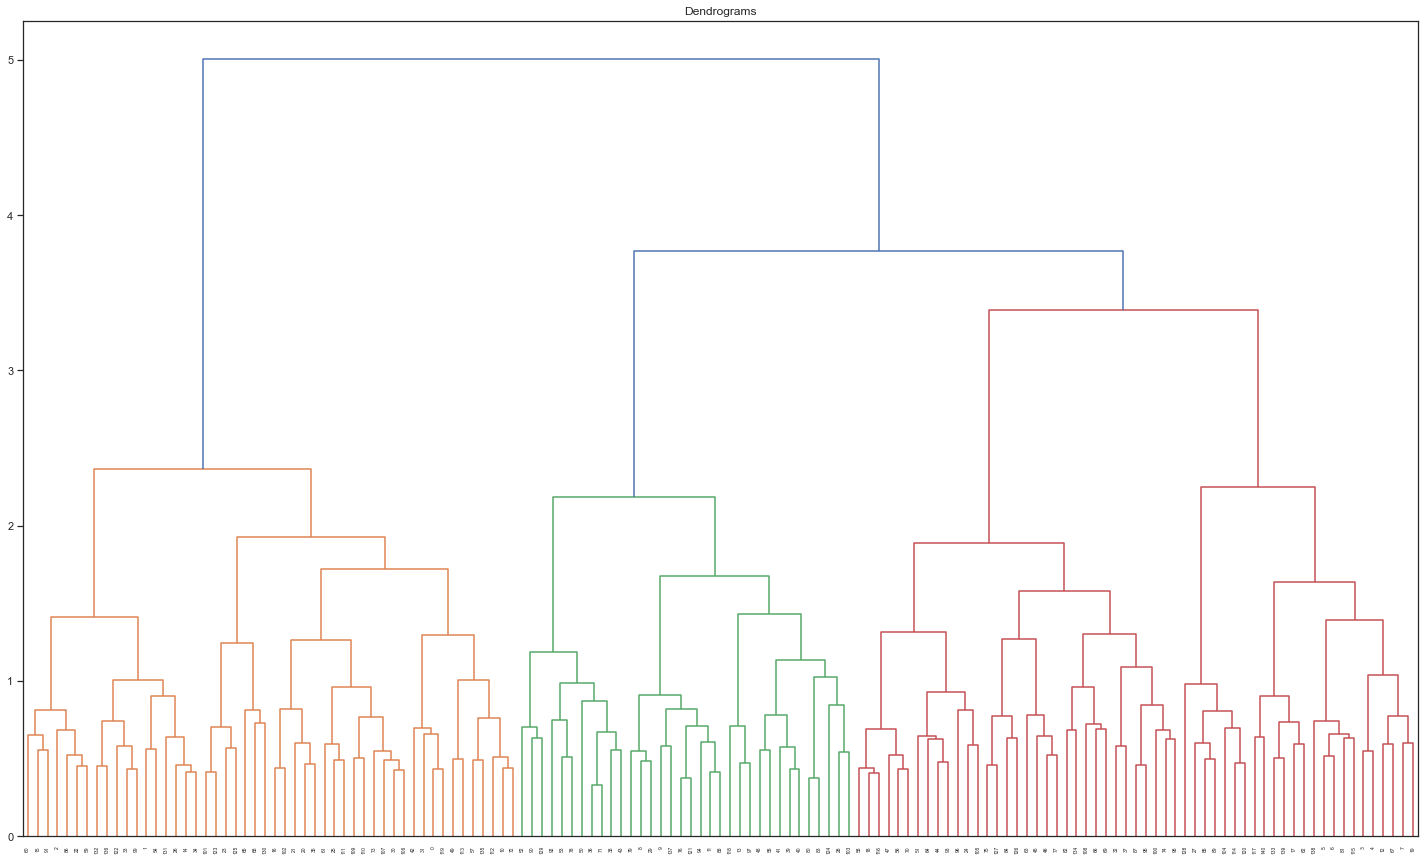

In [179]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(25,15))
plt.title('Dendrograms')
dend = shc.dendrogram(shc.linkage(df_scaled, method = 'ward'))

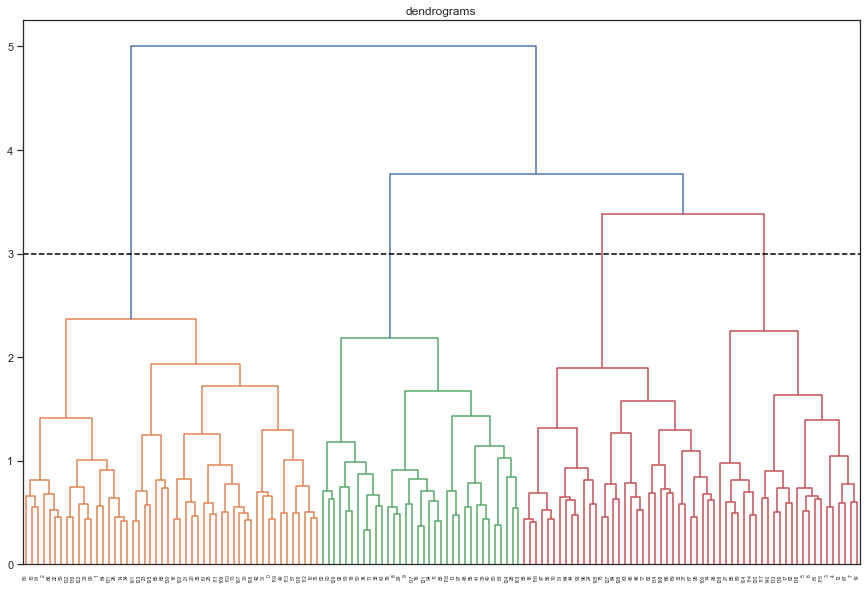

In [178]:
plt.figure(figsize=(15,10))
plt.title("dendrograms")
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.axhline(y=3, color='black', linestyle='--')

In [181]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(df_scaled)

array([1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 2, 2, 2, 2, 1, 2,
       0, 0, 0, 0, 2, 1, 2, 0, 2, 2, 1, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 1, 0,
       2, 0, 2, 1, 2, 0, 2, 0, 0, 2, 0, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 2, 1, 0, 0, 0, 2, 1, 1,
       1, 0, 0, 1, 1, 2, 0, 0, 0])

TypeError: float() argument must be a string or a number, not 'AgglomerativeClustering'

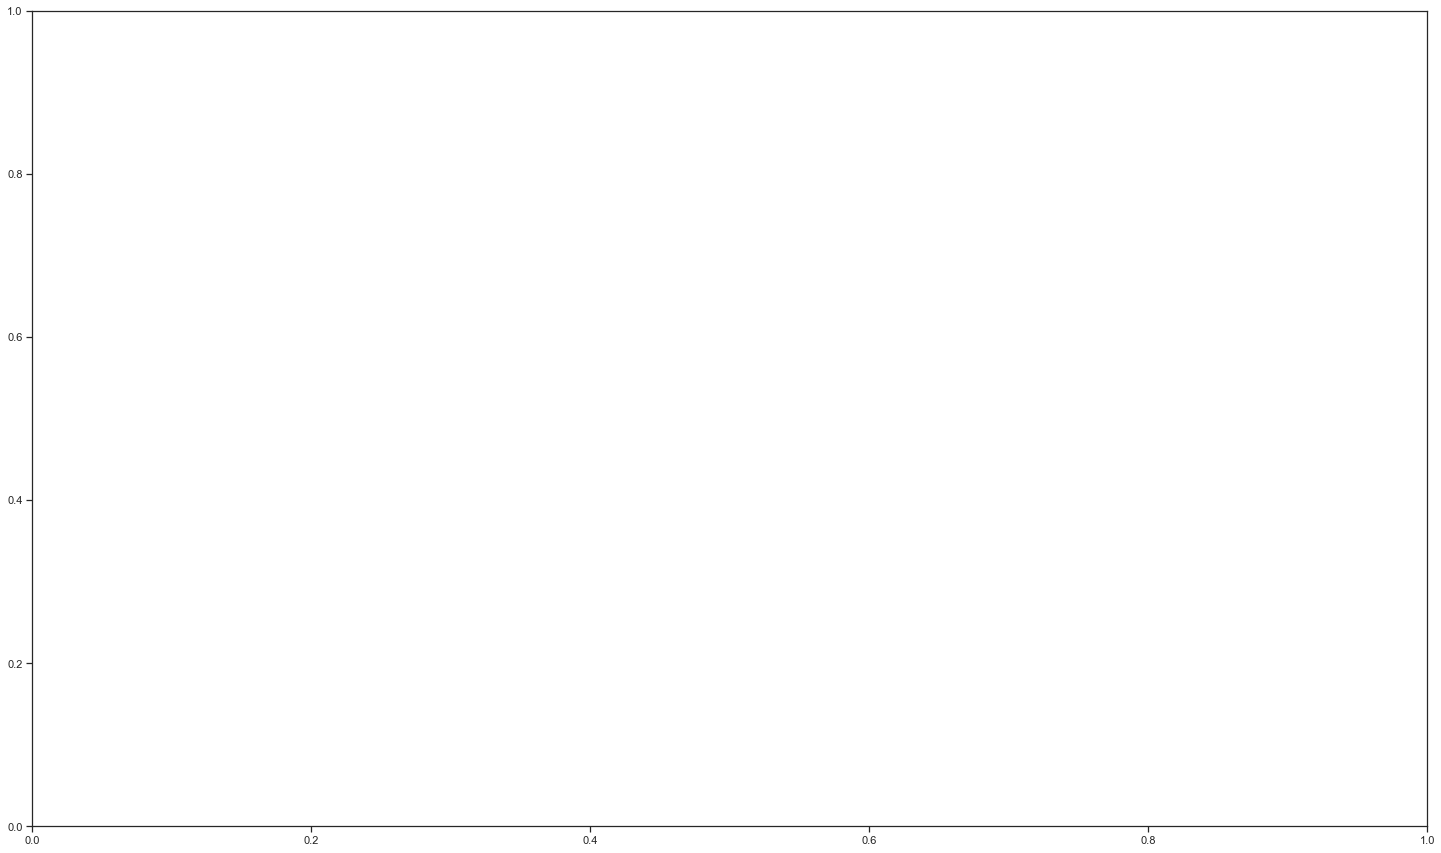

In [184]:
plt.figure(figsize=(25,15))
plt.scatter(df_scaled['SPECT_pre_ESE'],df_scaled['SPECT_pre_EDE'],c=cluster)

In [122]:
print(df[num_cols + bool_cols + cat_cols + label_cols])
X

          Age  ECG_pre_QRSd  SPECT_pre_EDE  SPECT_pre_EDSI  SPECT_pre_EDV  \
0   -0.099501      2.245018       0.883097       -1.060158      -0.876875   
1   -0.099501     -0.629465       1.204991       -1.689033      -1.051315   
2    1.498814     -0.117571       0.055447        0.153677      -1.002860   
3    0.344475      3.032548      -0.847436        1.010430       0.867528   
4    0.610861      1.063724      -1.179680        1.229689       1.313319   
..        ...           ...            ...             ...            ...   
136  1.143633     -1.062607       0.669594       -0.697848      -1.196682   
137  0.699657      1.457488       0.698185       -0.744127       0.567103   
138  1.054838      3.032548      -1.333550        1.315590      -0.557068   
139  1.676405     -1.692630      -0.758855        0.943866      -0.033747   
140  0.788452     -1.692630      -0.387740        0.625450      -0.905948   

     SPECT_pre_ESE  SPECT_pre_ESSI  SPECT_pre_ESV  SPECT_pre_LVEF  \
0     

Age  ECG_pre_QRSd  SPECT_pre_EDE  SPECT_pre_EDSI  SPECT_pre_EDV  \
0   -0.099501      2.245018       0.883097       -1.060158      -0.876875   
1   -0.099501     -0.629465       1.204991       -1.689033      -1.051315   
2    1.498814     -0.117571       0.055447        0.153677      -1.002860   
3    0.344475      3.032548      -0.847436        1.010430       0.867528   
4    0.610861      1.063724      -1.179680        1.229689       1.313319   
..        ...           ...            ...             ...            ...   
136  1.143633     -1.062607       0.669594       -0.697848      -1.196682   
137  0.699657      1.457488       0.698185       -0.744127       0.567103   
138  1.054838      3.032548      -1.333550        1.315590      -0.557068   
139  1.676405     -1.692630      -0.758855        0.943866      -0.033747   
140  0.788452     -1.692630      -0.387740        0.625450      -0.905948   

     SPECT_pre_ESE  SPECT_pre_ESSI  SPECT_pre_ESV  SPECT_pre_LVEF  \
0         0.889092       -1.026228      -1.001437        1.357322   
1         1.064130       -1.332932      -1.022815        0.794763   
2         0.024570        0.170512      -0.958681        0.569740   
3        -0.489454        0.691179       0.569856        0.232205   
4         0.395109       -0.286002       0.879839        0.344717   
..             ...             ...            ...             ...   
136       1.089897       -1.380389      -1.546580        3.720067   
137       0.670930       -0.678448       0.751571       -1.117935   
138      -0.756494        0.916891      -0.926614        2.144904   
139       0.468514       -0.385714      -0.178379        0.344717   
140      -1.045082        1.129918      -0.862479        0.457228   

     SPECT_pre_PBW  ...  Concordance   DM  Gender  HTN  LBBB   MI  Smoking  \
0        -0.183603  ...          0.0  0.0     0.0  0.0   1.0  0.0      0.0   
1        -1.699129  ...          1.0  0.0     0.0  1.0   1.0  0.0      0.0   
2        -1.092919  ...          0.0  1.0     0.0  1.0   1.0  1.0      0.0   
3        -1.437357  ...          0.0  1.0     0.0  1.0   1.0  1.0      0.0   
4        -1.809350  ...          0.0  1.0     1.0  1.0   1.0  1.0      0.0   
..             ...  ...          ...  ...     ...  ...   ...  ...      ...   
136      -1.437357  ...          1.0  1.0     1.0  1.0   1.0  1.0      1.0   
137       0.036838  ...          1.0  0.0     1.0  1.0   1.0  0.0      0.0   
138      -0.266268  ...          0.0  0.0     1.0  1.0   1.0  0.0      0.0   
139      -0.748481  ...          1.0  1.0     1.0  1.0   1.0  1.0      0.0   
140      -0.693371  ...          0.0  1.0     0.0  0.0   1.0  0.0      0.0   

     NYHA      Race  response  
0     4.0  0.338220         1  
1     2.0 -2.262998         1  
2     4.0 -2.262998         1  
3     3.0  0.338220         0  
4     3.0  0.338220         0  
..    ...       ...       ...  
136   2.0 -0.528853         1  
137   2.0 -0.528853         1  
138   3.0 -0.528853         0  
139   3.0 -0.528853         0  
140   3.0 -0.528853         1  

[141 rows x 24 columns]

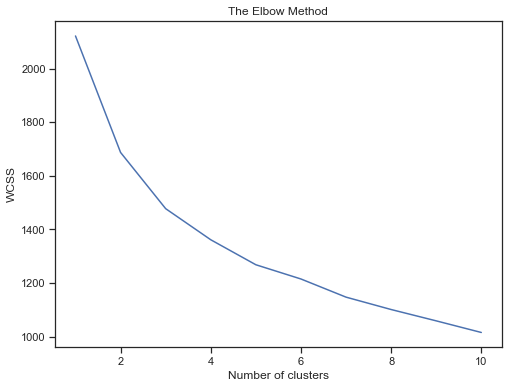

In [123]:
# Basically, number of clusters = the x-axis value of the point that is 
# the corner of the "elbow"(the plot looks often looks like an elbow)
# WCSS is within the cluster sum of squares
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [124]:
# build the model with the output from elbow method which is 2
# init: Initialization method of the centroids. Value will be "k-means++"
# k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
# n_clusters: The number of clusters to form as well as the number of centroids to generate.
# n_init: Number of time the k-means algorithm will be run with different centroid seeds. 
# The final results will be the best output of n_init consecutive runs in terms of inertia. Value will be 12

clusterNum = 3
k_means =KMeans(init='k-means++', n_clusters=clusterNum, n_init=12)

# fit the KMeans model with the feature matrix created above, X
k_means.fit_predict(X)

# grab the labels for each point in the model using k_means.labels_ attribute and save it as labels
labels = k_means.labels_
print(labels)

[2 2 2 1 1 2 2 2 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2 1 0 2 2 1 0 2 2 2 1 2 2 2 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 2 0 0 2 0 2 2 2 2 0 1 2 1 1 2 1 0 0 2 2
 0 1 0 1 2 0 0 2 0 0 1 1 2 1 0 1 0 2 0 0 0 1 0 0 0 2 0 1 2 0 1 0 2 2 0 2 2
 2 2 2 1 2 0 1 0 2 1 0 2 2 0 0 1 1 1 0 2 2 2 2 1 2 2 0 1 2 1]


In [125]:
# We assign the labels to each row in dataframe.
df_ = df[num_cols + bool_cols + cat_cols + label_cols]
df_['Clus_no'] = labels
print(df_.head())
print('\n')

# To easily check the centroid values by averaging the features in each cluster
print(df_.groupby('Clus_no').mean())

        Age  ECG_pre_QRSd  SPECT_pre_EDE  SPECT_pre_EDSI  SPECT_pre_EDV  \
0 -0.099501      2.245018       0.883097       -1.060158      -0.876875   
1 -0.099501     -0.629465       1.204991       -1.689033      -1.051315   
2  1.498814     -0.117571       0.055447        0.153677      -1.002860   
3  0.344475      3.032548      -0.847436        1.010430       0.867528   
4  0.610861      1.063724      -1.179680        1.229689       1.313319   

   SPECT_pre_ESE  SPECT_pre_ESSI  SPECT_pre_ESV  SPECT_pre_LVEF  \
0       0.889092       -1.026228      -1.001437        1.357322   
1       1.064130       -1.332932      -1.022815        0.794763   
2       0.024570        0.170512      -0.958681        0.569740   
3      -0.489454        0.691179       0.569856        0.232205   
4       0.395109       -0.286002       0.879839        0.344717   

   SPECT_pre_PBW  ...   DM  Gender  HTN  LBBB   MI  Smoking  NYHA      Race  \
0      -0.183603  ...  0.0     0.0  0.0   1.0  0.0      0.0   4.0  

In [126]:
df_.columns

Index(['Age', 'ECG_pre_QRSd', 'SPECT_pre_EDE', 'SPECT_pre_EDSI',
       'SPECT_pre_EDV', 'SPECT_pre_ESE', 'SPECT_pre_ESSI', 'SPECT_pre_ESV',
       'SPECT_pre_LVEF', 'SPECT_pre_PBW', 'SPECT_pre_PSD', 'SPECT_pre_50scar',
       'ACEI_or_ARB', 'CAD', 'Concordance', 'DM', 'Gender', 'HTN', 'LBBB',
       'MI', 'Smoking', 'NYHA', 'Race', 'response', 'Clus_no'],
      dtype='object')

In [127]:
X

Age  ECG_pre_QRSd  SPECT_pre_EDE  SPECT_pre_EDSI  SPECT_pre_EDV  \
0   -0.099501      2.245018       0.883097       -1.060158      -0.876875   
1   -0.099501     -0.629465       1.204991       -1.689033      -1.051315   
2    1.498814     -0.117571       0.055447        0.153677      -1.002860   
3    0.344475      3.032548      -0.847436        1.010430       0.867528   
4    0.610861      1.063724      -1.179680        1.229689       1.313319   
..        ...           ...            ...             ...            ...   
136  1.143633     -1.062607       0.669594       -0.697848      -1.196682   
137  0.699657      1.457488       0.698185       -0.744127       0.567103   
138  1.054838      3.032548      -1.333550        1.315590      -0.557068   
139  1.676405     -1.692630      -0.758855        0.943866      -0.033747   
140  0.788452     -1.692630      -0.387740        0.625450      -0.905948   

     SPECT_pre_ESE  SPECT_pre_ESSI  SPECT_pre_ESV  SPECT_pre_LVEF  \
0         0.889092       -1.026228      -1.001437        1.357322   
1         1.064130       -1.332932      -1.022815        0.794763   
2         0.024570        0.170512      -0.958681        0.569740   
3        -0.489454        0.691179       0.569856        0.232205   
4         0.395109       -0.286002       0.879839        0.344717   
..             ...             ...            ...             ...   
136       1.089897       -1.380389      -1.546580        3.720067   
137       0.670930       -0.678448       0.751571       -1.117935   
138      -0.756494        0.916891      -0.926614        2.144904   
139       0.468514       -0.385714      -0.178379        0.344717   
140      -1.045082        1.129918      -0.862479        0.457228   

     SPECT_pre_PBW  ...  Concordance   DM  Gender  HTN  LBBB   MI  Smoking  \
0        -0.183603  ...          0.0  0.0     0.0  0.0   1.0  0.0      0.0   
1        -1.699129  ...          1.0  0.0     0.0  1.0   1.0  0.0      0.0   
2        -1.092919  ...          0.0  1.0     0.0  1.0   1.0  1.0      0.0   
3        -1.437357  ...          0.0  1.0     0.0  1.0   1.0  1.0      0.0   
4        -1.809350  ...          0.0  1.0     1.0  1.0   1.0  1.0      0.0   
..             ...  ...          ...  ...     ...  ...   ...  ...      ...   
136      -1.437357  ...          1.0  1.0     1.0  1.0   1.0  1.0      1.0   
137       0.036838  ...          1.0  0.0     1.0  1.0   1.0  0.0      0.0   
138      -0.266268  ...          0.0  0.0     1.0  1.0   1.0  0.0      0.0   
139      -0.748481  ...          1.0  1.0     1.0  1.0   1.0  1.0      0.0   
140      -0.693371  ...          0.0  1.0     0.0  0.0   1.0  0.0      0.0   

     NYHA      Race  response  
0     4.0  0.338220         1  
1     2.0 -2.262998         1  
2     4.0 -2.262998         1  
3     3.0  0.338220         0  
4     3.0  0.338220         0  
..    ...       ...       ...  
136   2.0 -0.528853         1  
137   2.0 -0.528853         1  
138   3.0 -0.528853         0  
139   3.0 -0.528853         0  
140   3.0 -0.528853         1  

[141 rows x 24 columns]

In [128]:
print(df_.shape)
df_

(141, 25)


Age  ECG_pre_QRSd  SPECT_pre_EDE  SPECT_pre_EDSI  SPECT_pre_EDV  \
0   -0.099501      2.245018       0.883097       -1.060158      -0.876875   
1   -0.099501     -0.629465       1.204991       -1.689033      -1.051315   
2    1.498814     -0.117571       0.055447        0.153677      -1.002860   
3    0.344475      3.032548      -0.847436        1.010430       0.867528   
4    0.610861      1.063724      -1.179680        1.229689       1.313319   
..        ...           ...            ...             ...            ...   
136  1.143633     -1.062607       0.669594       -0.697848      -1.196682   
137  0.699657      1.457488       0.698185       -0.744127       0.567103   
138  1.054838      3.032548      -1.333550        1.315590      -0.557068   
139  1.676405     -1.692630      -0.758855        0.943866      -0.033747   
140  0.788452     -1.692630      -0.387740        0.625450      -0.905948   

     SPECT_pre_ESE  SPECT_pre_ESSI  SPECT_pre_ESV  SPECT_pre_LVEF  \
0         0.889092       -1.026228      -1.001437        1.357322   
1         1.064130       -1.332932      -1.022815        0.794763   
2         0.024570        0.170512      -0.958681        0.569740   
3        -0.489454        0.691179       0.569856        0.232205   
4         0.395109       -0.286002       0.879839        0.344717   
..             ...             ...            ...             ...   
136       1.089897       -1.380389      -1.546580        3.720067   
137       0.670930       -0.678448       0.751571       -1.117935   
138      -0.756494        0.916891      -0.926614        2.144904   
139       0.468514       -0.385714      -0.178379        0.344717   
140      -1.045082        1.129918      -0.862479        0.457228   

     SPECT_pre_PBW  ...   DM  Gender  HTN  LBBB   MI  Smoking  NYHA      Race  \
0        -0.183603  ...  0.0     0.0  0.0   1.0  0.0      0.0   4.0  0.338220   
1        -1.699129  ...  0.0     0.0  1.0   1.0  0.0      0.0   2.0 -2.262998   
2        -1.092919  ...  1.0     0.0  1.0   1.0  1.0      0.0   4.0 -2.262998   
3        -1.437357  ...  1.0     0.0  1.0   1.0  1.0      0.0   3.0  0.338220   
4        -1.809350  ...  1.0     1.0  1.0   1.0  1.0      0.0   3.0  0.338220   
..             ...  ...  ...     ...  ...   ...  ...      ...   ...       ...   
136      -1.437357  ...  1.0     1.0  1.0   1.0  1.0      1.0   2.0 -0.528853   
137       0.036838  ...  0.0     1.0  1.0   1.0  0.0      0.0   2.0 -0.528853   
138      -0.266268  ...  0.0     1.0  1.0   1.0  0.0      0.0   3.0 -0.528853   
139      -0.748481  ...  1.0     1.0  1.0   1.0  1.0      0.0   3.0 -0.528853   
140      -0.693371  ...  1.0     0.0  0.0   1.0  0.0      0.0   3.0 -0.528853   

     response  Clus_no  
0           1        2  
1           1        2  
2           1        2  
3           0        1  
4           0        1  
..        ...      ...  
136         1        2  
137         1        0  
138         0        1  
139         0        2  
140         1        1  

[141 rows x 25 columns]

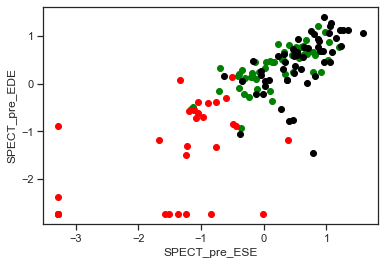

In [147]:
df1 = df_[df_.Clus_no==0]
df2 = df_[df_.Clus_no==1]
df3 = df_[df_.Clus_no==2]

plt.scatter(df1.SPECT_pre_ESE.values,df1['SPECT_pre_EDE'].values,color='green')
plt.scatter(df2.SPECT_pre_ESE.values,df2['SPECT_pre_EDE'].values,color='red')
plt.scatter(df3.SPECT_pre_ESE.values,df3['SPECT_pre_EDE'].values,color='black')

plt.xlabel('SPECT_pre_ESE')
plt.ylabel('SPECT_pre_EDE')
plt.show()

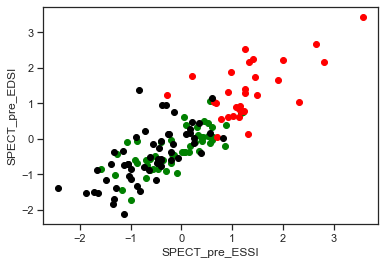

In [134]:
df1 = df_[df_.Clus_no==0]
df2 = df_[df_.Clus_no==1]
df3 = df_[df_.Clus_no==2]

plt.scatter(df1.SPECT_pre_ESSI,df1['SPECT_pre_EDSI'],color='green')
plt.scatter(df2.SPECT_pre_ESSI,df2['SPECT_pre_EDSI'],color='red')
plt.scatter(df3.SPECT_pre_ESSI,df3['SPECT_pre_EDSI'],color='black')

plt.xlabel('SPECT_pre_ESSI')
plt.ylabel('SPECT_pre_EDSI')
plt.show()

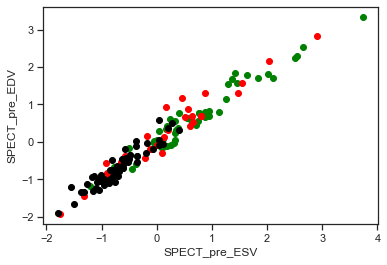

In [136]:
df1 = df_[df_.Clus_no==0]
df2 = df_[df_.Clus_no==1]
df3 = df_[df_.Clus_no==2]

plt.scatter(df1.SPECT_pre_ESV,df1['SPECT_pre_EDV'],color='green')
plt.scatter(df2.SPECT_pre_ESV,df2['SPECT_pre_EDV'],color='red')
plt.scatter(df3.SPECT_pre_ESV,df3['SPECT_pre_EDV'],color='black')

plt.xlabel('SPECT_pre_ESV')
plt.ylabel('SPECT_pre_EDV')
plt.show()

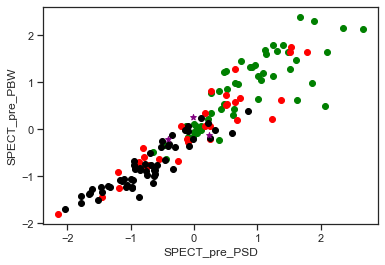

In [138]:
df1 = df_[df_.Clus_no==0]
df2 = df_[df_.Clus_no==1]
df3 = df_[df_.Clus_no==2]

plt.scatter(df1.SPECT_pre_PSD,df1['SPECT_pre_PBW'],color='green')
plt.scatter(df2.SPECT_pre_PSD,df2['SPECT_pre_PBW'],color='red')
plt.scatter(df3.SPECT_pre_PSD,df3['SPECT_pre_PBW'],color='black')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('SPECT_pre_PSD')
plt.ylabel('SPECT_pre_PBW')
plt.show()

In [140]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(df_, method='complete')  ## its the linkage function that does the HC
dendrogram(mergings, labels='labels', leaf_rotation=90, leaf_font_size=6)
plt.show()

ValueError: Dimensions of Z and labels must be consistent.